In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

In [2]:
path_to_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_Peter_and_Morten/merged_database/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_130000_888003.db"

with sql.connect(path_to_db) as con:
        table_query = """Select event_no, pid, energy, zenith, azimuth,position_x, position_y, position_z from truth;"""
        truth = read_sql(table_query, con)




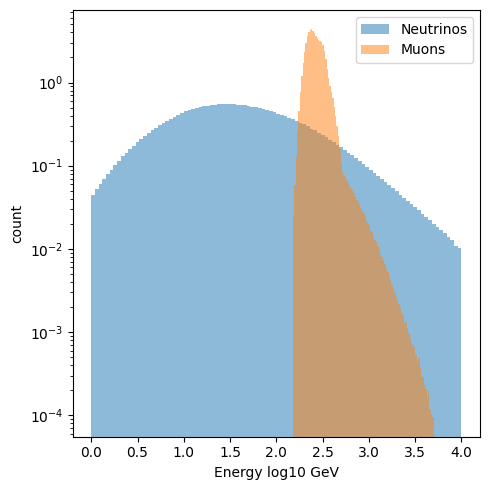

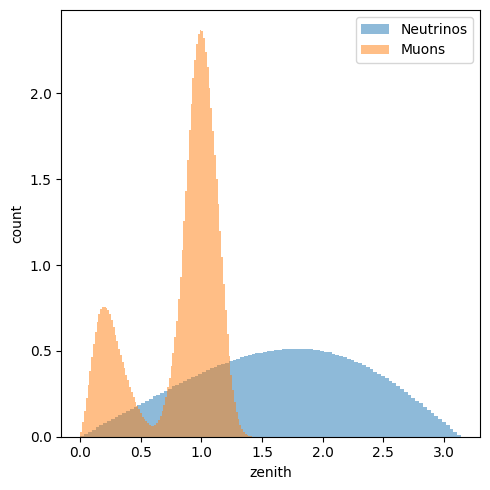

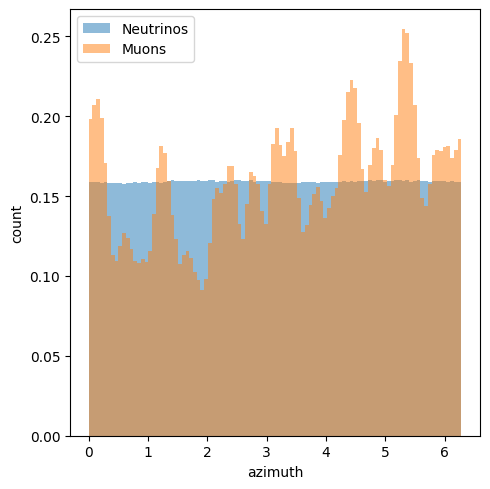

In [3]:
neutrino_events = truth['event_no'][truth['pid'].isin((-12,12,-14,14,-16,16))]
muon_events = truth['event_no'][truth['pid'].isin((-13,13))]

fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(np.log10(truth['energy'][truth['event_no'].isin(neutrino_events)]),bins=100,label='Neutrinos',alpha=0.5,density=True)
hist = axs.hist(np.log10(truth['energy'][truth['event_no'].isin(muon_events)]),bins=100,label='Muons',alpha=0.5,density=True)
axs.set_ylabel('count')
axs.set_xlabel('Energy log10 GeV')
axs.set_yscale('log')
axs.legend()
fig.tight_layout()

fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(truth['zenith'][truth['event_no'].isin(neutrino_events)],bins=100,label='Neutrinos',alpha=0.5,density=True)
hist = axs.hist(truth['zenith'][truth['event_no'].isin(muon_events)],bins=100,label='Muons',alpha=0.5,density=True)
axs.set_ylabel('count')
axs.set_xlabel('zenith')
axs.legend()
fig.tight_layout()


fig, axs = plt.subplots(figsize=(5, 5))

hist = axs.hist(truth['azimuth'][truth['event_no'].isin(neutrino_events)],bins=100,label='Neutrinos',alpha=0.5,density=True)
hist = axs.hist(truth['azimuth'][truth['event_no'].isin(muon_events)],bins=100,label='Muons',alpha=0.5,density=True)
axs.set_ylabel('count')
axs.set_xlabel('azimuth')
axs.legend()
fig.tight_layout()


In [4]:
path_to_db_new_muon = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"

with sql.connect(path_to_db_new_muon) as con:
        table_query = """
        Select event_no, pid, energy, zenith, azimuth,position_x, position_y, position_z from truth
        where pid in (-13,13)
        ;"""
        truth_new_muon = read_sql(table_query, con)


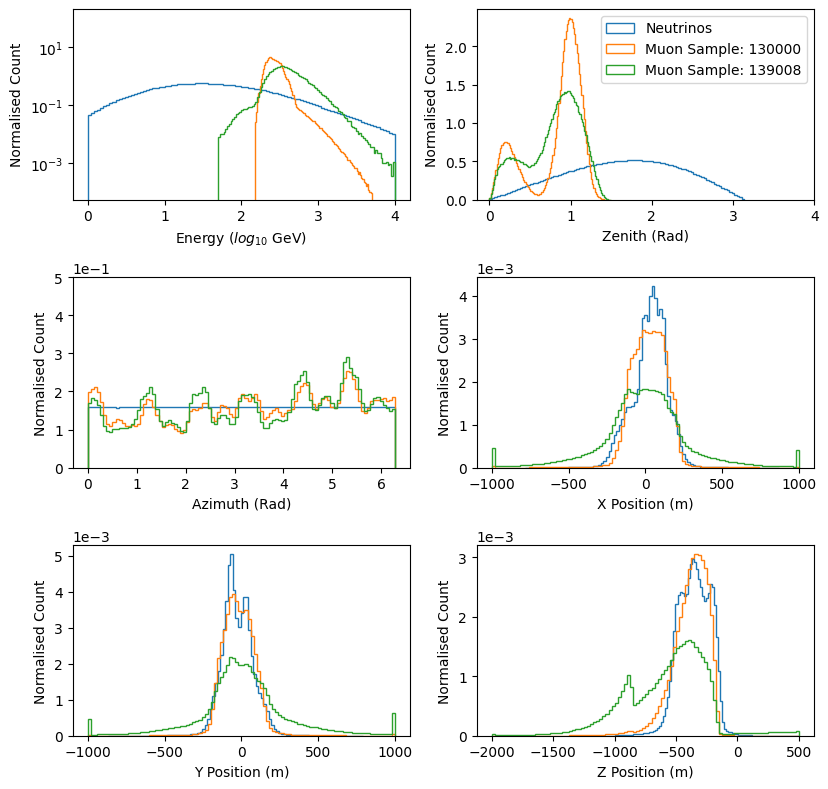

In [12]:
from standard_plotting import set_size

fig, axs = plt.subplots(3,2,figsize=set_size('thesis',subplots=(3,2),y_size=8,fraction=1.5))
axs[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

hist = axs[0,0].hist(np.log10(truth['energy'][truth['event_no'].isin(neutrino_events)]),bins=100,label='Neutrinos',alpha=1,density=True, histtype='step')
hist = axs[0,0].hist(np.log10(truth['energy'][truth['event_no'].isin(muon_events)]),bins=100,label='Muon Sample: 130000',alpha=1,density=True, histtype='step')
hist = axs[0,0].hist(np.log10(truth_new_muon['energy']),bins=100,label='Muon Sample: 139008',alpha=1,density=True, histtype='step')
axs[0,0].set_ylabel('Normalised Count')
axs[0,0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=200)
#axs[0,0].legend(loc='upper right')
fig.tight_layout()

hist = axs[0,1].hist(truth['zenith'][truth['event_no'].isin(neutrino_events)],bins=100,label='Neutrinos',alpha=1,density=True, histtype='step')
hist = axs[0,1].hist(truth['zenith'][truth['event_no'].isin(muon_events)],bins=100,label='Muon Sample: 130000',alpha=1,density=True, histtype='step')
hist = axs[0,1].hist(truth_new_muon['zenith'],bins=100,label='Muon Sample: 139008',alpha=1,density=True, histtype='step')
axs[0,1].set_ylabel('Normalised Count')
axs[0,1].set_xlabel('Zenith (Rad)')
axs[0,1].set_xlim(right=4)
axs[0,1].legend()
fig.tight_layout()

hist = axs[1,0].hist(truth['azimuth'][truth['event_no'].isin(neutrino_events)],bins=100,label='Neutrinos',alpha=1,density=True, histtype='step')
hist = axs[1,0].hist(truth['azimuth'][truth['event_no'].isin(muon_events)],bins=100,label='Muon Sample: 130000',alpha=1,density=True, histtype='step')
hist = axs[1,0].hist(truth_new_muon['azimuth'],bins=100,label='Muon Sample: 139008',alpha=1,density=True, histtype='step')
axs[1,0].set_ylabel('Normalised Count')
axs[1,0].set_xlabel('Azimuth (Rad)')
#axs[1,0].legend()
axs[1,0].set_ylim(top=0.5)
axs[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout()


hist = axs[1,1].hist(np.clip(truth['position_x'][truth['event_no'].isin(neutrino_events)],-1000,1000),bins=100,label='Neutrinos',alpha=1,density=True, histtype='step')
hist = axs[1,1].hist(np.clip(truth['position_x'][truth['event_no'].isin(muon_events)],-1000,1000),bins=100,label='Muon Sample: 130000',alpha=1,density=True, histtype='step')
hist = axs[1,1].hist(np.clip(truth_new_muon['position_x'],-1000,1000),bins=100,label='Muon Sample: 139008',alpha=1,density=True, histtype='step')
axs[1,1].set_ylabel('Normalised Count')
axs[1,1].set_xlabel('X Position (m)')
axs[1,1].set_xlim(-1100,1100)
axs[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#axs[1,1].legend()
fig.tight_layout()


hist = axs[2,0].hist(np.clip(truth['position_y'][truth['event_no'].isin(neutrino_events)],-1000,1000),bins=100,label='Neutrinos',alpha=1,density=True, histtype='step')
hist = axs[2,0].hist(np.clip(truth['position_y'][truth['event_no'].isin(muon_events)],-1000,1000),bins=100,label='Muon Sample: 130000',alpha=1,density=True, histtype='step')
hist = axs[2,0].hist(np.clip(truth_new_muon['position_y'],-1000,1000),bins=100,label='Muon Sample: 139008',alpha=1,density=True, histtype='step')
axs[2,0].set_ylabel('Normalised Count')
axs[2,0].set_xlabel('Y Position (m)')
axs[2,0].set_xlim(-1100,1100)
axs[2,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#axs[2,0].legend()
fig.tight_layout()


hist = axs[2,1].hist(np.clip(truth['position_z'][truth['event_no'].isin(neutrino_events)],-2000,500),bins=100,label='Neutrinos',alpha=1,density=True, histtype='step')
hist = axs[2,1].hist(np.clip(truth['position_z'][truth['event_no'].isin(muon_events)],-2000,500),bins=100,label='Muon Sample: 130000',alpha=1,density=True, histtype='step')
hist = axs[2,1].hist(np.clip(truth_new_muon['position_z'],-2000,500),bins=100,label='Muon Sample: 139008',alpha=1,density=True, histtype='step')
axs[2,1].set_ylabel('Normalised Count')
axs[2,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[2,1].set_xlabel('Z Position (m)')
#axs[2,1].legend()
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/New_muons/"
fig.savefig(outdir + 'New_vs_old_muon_distributions.png',bbox_inches='tight')


In [6]:
print(len(truth_new_muon))

719737


In [7]:
print(max(truth_new_muon['position_x']))
print(min(truth_new_muon['position_x']))
print(max(truth_new_muon['position_y']))
print(min(truth_new_muon['position_y']))
print(max(truth_new_muon['position_z']))
print(min(truth_new_muon['position_z']))

3834.659911867811
-5605.443169019679
5734.541864026624
-4226.454344355256
599.9548993683346
-3223.0466341707074
